In [33]:
import pandas as pd
import stanza
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm
import random
import re
import os
from os.path import join
import math
import time
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect
from langcodes import *
import language_data
from collections import Counter

from nltk import word_tokenize,sent_tokenize,pos_tag
from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords
import string
stopword_list = stopwords.words('english')
stopword_list.extend(['\'s','\'nt','’','``',"n't",'·','\'\'','...'])
for mark in string.punctuation:
    stopword_list.append(mark)
    
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
#from nltk.sentiment.vader import SentimentIntensityAnalyzer

ana = SentimentIntensityAnalyzer()

In [2]:
greek_users = pd.read_csv('greek_users.tsv',sep='\t')
dutch_users = pd.read_csv('dutch_users.tsv',sep='\t')

## Create the corpus

In [3]:
corpus_dir = 'Corpus'

if not os.path.exists(corpus_dir):
    os.makedirs(corpus_dir)
    
reviews_dir = 'Reviews'

if not os.path.exists(reviews_dir):
    os.makedirs(reviews_dir)
    
cleaned_reviews_dir = 'Cleaned_reviews'

if not os.path.exists(cleaned_reviews_dir):
    os.makedirs(cleaned_reviews_dir)

In [4]:
files = os.listdir(reviews_dir)
files = [file for file in files if not(re.search(r'^[.]',file))]

for file in files:
    full_text = ''
    path = join(reviews_dir,file)
    fh = open(path,encoding='utf-8')
    for review in fh:
        if not(re.search(r'^(.+)\'s review\s+[A-Z][a-z]{2}',review,re.IGNORECASE)):
            if re.search(r'\w+',review) and len(review.strip())>3:
                review = re.sub(r'\s+', ' ', review)
                full_text += review.strip()+'\n'
    with open(join(cleaned_reviews_dir,file),'w',encoding='utf-8') as out:
        out.write(full_text)

In [5]:
max_number = 1500

In [6]:
count = 0
sentence = ''
corpus = open(join(corpus_dir,'greek.txt'),'w',encoding='utf-8')

files = []
for i,row in greek_users.iterrows():
    path = join(cleaned_reviews_dir,f'{row["id"]}.txt')
    if os.path.isfile(path):
        files.append(path)
        
print(f"The reviews of {len(files)} Greek users have been downloaded.")

for file in tqdm(files):
    fh = open(file,encoding='utf-8')
    for review in fh:
        review = review.strip()
        review = re.sub(r'\s+',' ',review)
        try:
            language = detect(review)
        except:
            language = '[Unknown]'
            # The package cannot distinguish 
            # between Afrikaans and Dutch very well
        if language == 'af':
            language = 'nl'
        if language == 'en':
            count += 1
            if count <= max_number:
                corpus.write(f'{review}\n')

corpus.close()
sentence = f'{count} English reviews written by Greek users have been downloaded.'

The reviews of 230 Greek users have been downloaded.


100%|█████████████████████████████████████████| 230/230 [00:43<00:00,  5.24it/s]


In [7]:
count = 0
corpus = open(join(corpus_dir,'dutch.txt'),'w',encoding='utf-8')

files = []
for i,row in dutch_users.iterrows():
    path = join(cleaned_reviews_dir,f'{row["id"]}.txt')
    if os.path.isfile(path):
        files.append(path)
        
print(f"The reviews of {len(files)} Dutch users have been downloaded.")

for file in tqdm(files):
    fh = open(file,encoding='utf-8')
    for review in fh:
        review = review.strip()
        review = re.sub(r'\s+',' ',review)
        try:
            language = detect(review)
        except:
            language = '[Unknown]'
 
            # The package cannot distinguish 
            # between Afrikaans and Dutch very well
        if language == 'af':
            language = 'nl'
        if language == 'en':
            count += 1
            if count <= max_number:
                corpus.write(f'{review}\n')

corpus.close()
sentence += f'\n{count} English reviews written by Dutch users have been downloaded.'

The reviews of 152 Dutch users have been downloaded.


100%|█████████████████████████████████████████| 152/152 [00:39<00:00,  3.86it/s]


In [8]:
print(sentence)

1864 English reviews written by Greek users have been downloaded.
1623 English reviews written by Dutch users have been downloaded.


## Analysis of vocabulary

In [9]:
reviews = open(join(corpus_dir,'dutch.txt'),encoding='utf-8')
dutch_full_text = reviews.read()
words = word_tokenize(dutch_full_text.lower())
words = [word for word in words if word not in stopword_list]
dutch_freq = Counter(words)

reviews = open(join(corpus_dir,'greek.txt'),encoding='utf-8')
greek_full_text = reviews.read()
words = word_tokenize(greek_full_text.lower())
words = [word for word in words if word not in stopword_list]
greek_freq = Counter(words)

In [10]:
for word,count in dutch_freq.most_common(30):
    print(word,count)

book 2758
read 1086
like 871
one 700
story 679
really 674
life 577
love 528
reading 491
much 473
time 473
would 472
also 472
way 467
even 405
people 402
think 388
books 361
characters 356
first 354
good 340
world 338
get 337
still 328
could 327
interesting 323
many 309
little 300
novel 298
know 294


In [11]:
for word,count in greek_freq.most_common(30):
    print(word,count)

book 1820
read 782
like 757
one 693
story 613
love 565
really 540
way 465
even 448
much 414
life 406
characters 404
time 384
would 361
well 346
reading 338
loved 334
first 333
author 320
could 316
also 315
good 313
people 303
books 298
get 290
plot 279
end 262
writing 261
know 242
felt 240


In [12]:
count = 0
for word,count in dutch_freq.most_common():
    if word not in greek_freq.keys():
        count += 1
        print(word)
        if count == 30:
            break

castaneda
juan
ciri
maas
stone
slave
longstreet
colonial
rin
observations
massive
intent
characterization
assemblage
lincoln
sorcerer
crowley
accessible
dr.
austen
nahri
geralt
psychedelic
empire
kuang
wolfe
isaacson
gettysburg
casteneda
relatively
players
eileen
passage
meditation
amir
motivations
aelin
en
motivation
asher
lasting
vanessa
framework
sorcerers
nagual
twenties
greatness
300
heir
yennefer
n-word
alcott
laia
ignifex
fort
june
funds
admittedly
vc
•
bolívar
increasingly
insufferable
shift
agency
united
tamlin
malini
pickett
buddhist
eagle
it.i
franklin
pynchon
population
elias
resolution
confronted
haig
dara
westeros
druon
hyde
hassan
ivu
mae
horwitz
guru
height
alcohol
frequently
moshfegh
equation
instructions
reasoning
overview
extensive
gene
franny
hungry
strategy
board
worldview
groups
thompson
buildings
7.5
texas
articles
ukraine
shared
dickens
han
nesta
silas
priya
roland
gloria
lev
gorman
downfall
filler
caricature
founders
justification
debate
interpretations
fund
lo

metaphysics
underlined
column
underscored
comprehension
mississippi
lab
stamina
loathing
browsing
seeps
5.5
qualifies
demolition
beatle
6.5
marginally
namesake
hinder
showcase
3-4
suits
jot
gallery
8.5
subway
contrasted
roy
omission
structural
conveniently
eavesdropping
intriguingly
needle
shenanigans
elevator
cop
hampered
devolved
uncharacteristic
unveiled
seed
heavens
perchance
baltimore
punctuated
sublimely
hopelessness
programmes
honored
norman
portion
interviewees
geared
goose
populate
pimping
disadvantaged
longhairs
naturalistic
hi
pays
integrate
presumed
hashish
dollar
right-wing
disdain
handed
cops
assert
utah
newspaper
overlong
contributions
tickle
superfluous
abyss
annotations
fondest
whem
implausible
hunch
trinity
urine
innuendos
nightly
parks
lookin
yale
internally
omniscient
thinner
vineland
determining
optimal
compliments
exposing
shoulders
timewave
kooky
lend
strays
p.s
dates
all-out
metropolis
exceedingly
unwind
billed
pablo
catholics
murdering
cloud
pranksters
350
stev

crowleys
sterile
adoration
denies
matches
meth
shapeshifting
doubling
heaps
soledad
contraptions
non-ado
trickery
pupils
magnetism
fittest
fitness
inger
1917
collects
rhino
oblivious
suppress
jimson
inconsistencies
muni
florinda
submitted
obeying
140
pimp
distributed
deepens
oppressor
rescues
1909
walser
walsers
ineffective
endles
1973
seeers
totality
emanations
self-importance
buddhistic
impeccability
textbook
catalina
rehashing
mortally
magicians
stresses
worthwile
austrian-hungarian
'stalking
mentality
8th
mechanical
dreamers
spontaneously
modes
implacable
nagual/sorcerer
stalk
'proof
convictions
trickster
reciting
bia
genocide
heaney
chanting
vipassana
//
clinging
unassociated
beep
prc
unremarkable
conceptual
three-body
wallfacer
wood
micro
macro
disruptive
insignificance
logging
newscaster
los
angeles
romp
tidy
jaws
blockbuster
it.overall
airbnb
'philanthropy
coloring
regulations
realizable
survey
vr
voting
ww1
it.but
overseen
buuuuuit
no.let
sharply
squirrel
baobab
-_-now
broody


west-african
hackers
left-
hofstadter
gödel
escher
bach
braid.about
postmodernism
fives
nonlinear
physics-related
sewn
mysterical
bid
tomfoolery
bathtub
faeces
eponymous
awry
literature.perhaps
christianfor
shits
giggles
seething
seedy
warded
stoops
injecting
temporary-relief
solvents
unleashed
declines
acquaintances
u.k.
whirling
quagmire
denpasar
b12
vitamin
provocation
self-replenishing
beatles
latch
turtles
cement
naoke
kikure
ejaculating
soul-to-soul
ntothing
abnormal
lightness
holow
echo
faithfully
roof
addicts
all-knowing
re-readable
instilled
voluntary
eighteenth
catalogue
keywords
embodied
anyway.what
lieutenants
majors
showcasing
privates
corporals
sergeants
deadpan
incompetence
balanceand
adrenaline
obstruct
mayhaps
hunnerd
pur-cent
embellishes
friendo
shire
redeems
mathematic
masterminds
dulls
greats
riemann
euler
napoleon
bonaparte
lobatchewsky
kazan
mathematicians
galois
countercultural
hermite
universalist
cantor
kirkusreviews.com
perilously
malpractice
foulness
horrific

child-rearing
childs
hampers
look-recognise-trust
drummond
flexitarian
give-aways
yuppy
sweating
courtship
briljant
blogshop
matthijs
nieuwkerk
poser
fishing
champion
humility
verhoef
lectuur
literatuur
beige
renovated
garage
handicaps
speedboat
himself.the
unshared
gardner
calum
macleod
crofter
raasay
single-handedly
brick
textile
milan/zzz
anti-communist
yiyun
down-to-earth
exasperation
recognizeable
prtagonist
bicycle
schooling
criminality
staunch
turkish-dutch
deplorable
one-star
british-jewish
bangladeshi
apotheosis
dreef
birdwatcher
developming
talents
eveline
crone
granddaughters
festival
yourself.the
adapted
gretchen
schields
gameworld
sf
againt
senselessness
cao
opening-up
wariness
u-turns
insider
dehumanisation
samsa
spoileralert
cease
self-respect
'other
floss
tulliver
strong-willed
ending.a.s
byatt
madlads
stom
synthetische
gaaf
analytisch
posteriori
iets
minder
opinoin
distopian
'millie
electrons
carmine
rose.
wazhashk
gidizhinikaaz
locker
25-5-2-11
say.she
playfully
uit
'

undone
85th
rundown
shack
pariah
constable
aprt
slurs
are.coming
gears
aretha
nineteen
beale
pervasive
gadfly-like
approachable
old-boy
refresher
ethnic
restricting
remnant
unconditionally
situate
edwin
1912
mirella
2203
gaspery
2401
geographically
time-wise
confounds
destruction.this
pew-pew
melodies
mandel.the
2020/2021
aristophanes
agathon
cultivate
wrong/funny
amounts
ending.but
incubator
bloodthirsty
wench
feelings/thoughts
tlc
exploitative
man-
pauline
verses
apart.
west-africa
okonkwo
inflicted
name.
wiles
baron
roger
absconds
reclaim
she-wolf
less/different
love-sick
puppy
monarchical
monarch
jb
transcends
ebb
unknowable
orientation
side-characters
andy
change/progress
threshold
respectfully
traylor
600.
violating
mongol
starved
shongba
find.i
shocker
bamboozled
wang
magic/divine
mandate
conjure
humiliation
fisting
scene…
narrowly
portals
rejoin
war.i
also/even
womb
her…
tug
strings
stygga
iola
jarre
bawled
toussaint
never.it
nimue
condwiramurs
arthurian
lords
doomed.
hardened


tweets
must-see
must-do
must-have
gadgets
leaning
mattress
necessities
improvements.he
exacting
toys
unimproved
coincided
15-16-year-old
etherial
commiserate
formats
confront
perennial
-that
coherency
unrelatable
anectodes
enneagram
uninformative
briggs-meyers
extraverted
negatively
extraverts
silly.and
quizzes
thrive
'embarrassing
introverts
relaxed
nailing
jell-o
cater
pre-teens
goal.still
opposing
commandments
shalt
resting
conspicuously
unstated
275
homecoming
273
amos
portrarying
vegetarianism
nothern
xi
drown
maimed
weakened
mercury
chloride
illnesses
amputations
center.the
eyebrow
209
goody-goody
altering
faux
plausibility
61
chaplain
poisoning
eden
outcasts
list.p.s
ms.
whined
colonized
tomes
moaning
internment
stonewall
sunken
constrained
steinway
attends
toured
red-faced
worn-out
scanty
1867
1868
365
invention
pseudonym
josephine
slip-ups
athenaeum
p.4
1862
vaughn
216
1869.
adorned
1871
purportedly
wedding.about
pad
runtime
slowing
proposal
thirty-nine
childbirth
uninspired.a

unfortunetely
trough
overal
revieuw
especialy
weekend😊
writtenn
finnaly
ash
😁
'downside
slowpaced
one🤗
later😉
lovelies
one😍
ehm
'heir
growing♡
book.so
brigid
kemmerer
defenately
eighty
patronising
angelou
marginalisation
critique/essay
slog
sliver
faiths
noticeable
worsening
rip-off
not-too-literary
page-turners
freeeeee
slew
campert
dwelling
vurrukkulluk
progressions
journals
krabbé
inject
visualise
suspension
props
rank
prospect
superiority
agnosticism
yearnful
shone
conventions
obedience
coldness
marvelously
malpractices
hallmark
unwritten
functioned
tempo
intensity
dracula
prada
interwar
explosions
debts.i
tougher
terminal
bullet
favourable
weaponry
unheard
of.am
after-war
sorely
envisions
proclaimed
war-torn
country.the
brat
hazara
green-eyed
childhood.amir
misuses
race.amir
printing
runyan
1955
freely
fro
stocky
'60
flunked
investigations
1966
conquered
tamed
intensify
half-heartedly
disciple
webu
sayadaw
anapana
satanist
affordable
trance-like
1904
occult
écriture
automatique
st

In [13]:
count = 0
for word,count in greek_freq.most_common():
    if word not in dutch_freq.keys():
        count += 1
        print(word)
        if count == 30:
            break

zoey
lyrics


In [14]:
lengths = []

nr_reviews = 0
reviews = open(join(corpus_dir,'dutch.txt'),encoding='utf-8')
for review in reviews:
    if re.search(r'\w+',review):
        review = review.strip()
        nr_reviews += 1
        words = word_tokenize(review)
        lengths.append(len(words))
        
print('Average length of Dutch review:')
print(f'{round(sum(lengths)/nr_reviews,2)} words.')

Average length of Dutch review:
163.35 words.


In [15]:
lengths = []

nr_reviews = 0
reviews = open(join(corpus_dir,'greek.txt'),encoding='utf-8')
for review in reviews:
    if re.search(r'\w+',review):
        review = review.strip()
        nr_reviews += 1
        words = word_tokenize(review)
        lengths.append(len(words))

print('Average length of Greek review:')
print(f'{round(sum(lengths)/nr_reviews,2)} words.')

Average length of Greek review:
136.79 words.


## Named Entity Recognition

In [16]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,ner')

2024-05-29 00:22:48 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| ner       | ontonotes |

2024-05-29 00:22:48 INFO: Use device: cpu
2024-05-29 00:22:48 INFO: Loading: tokenize
2024-05-29 00:22:48 INFO: Loading: ner
2024-05-29 00:22:49 INFO: Done loading processors!


In [17]:
works_of_art_dutch = []
organisations_dutch = []
locations_dutch = []

reviews = open(join(corpus_dir,'dutch.txt'),encoding='utf-8')
for review in tqdm(reviews):
    doc = nlp(review)
    for ent in doc.ents:
        ent.text = re.sub(r'[\"\']','',ent.text)
        if ent.type == 'WORK_OF_ART':
            works_of_art_dutch.append(ent.text)
        elif ent.type == 'GPE':
            locations_dutch.append(ent.text)
        elif ent.type == 'ORG':
            organisations_dutch.append(ent.text)


1500it [29:32,  1.18s/it]


In [18]:
works_of_art_greek = []
organisations_greek = []
locations_greek = []

reviews = open(join(corpus_dir,'greek.txt'),encoding='utf-8')
for review in tqdm(reviews):
    doc = nlp(review)
    for ent in doc.ents:
        ent.text = re.sub(r'[\"\']','',ent.text)
        if ent.type == 'WORK_OF_ART':
            works_of_art_greek.append(ent.text)
        elif ent.type == 'GPE':
            locations_greek.append(ent.text)
        elif ent.type == 'ORG':
            organisations_greek.append(ent.text)

1500it [24:21,  1.03it/s]


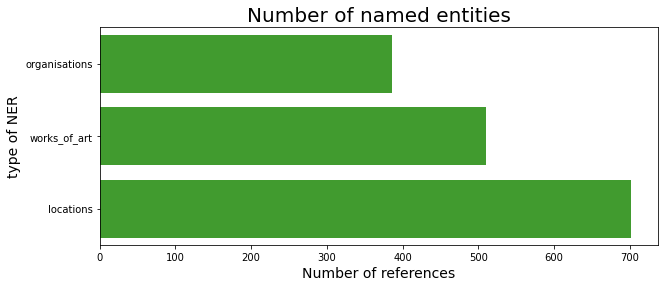

In [25]:
y_axis = ['organisations','works_of_art','locations']
x_axis = [len(organisations_dutch),len(works_of_art_dutch),len(locations_dutch)]


fig = plt.figure( figsize=( 10 , 4 ) )


graph = sns.barplot(y=y_axis,x=x_axis,color="#35ad1d")

graph.set_title(f'Number of named entities' , size = 20) 
graph.set_xlabel('Number of references' , size = 14) 
graph.set_ylabel('type of NER' , size = 14 )

plt.show()


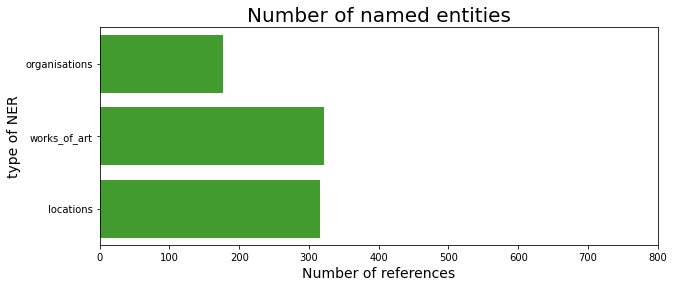

In [27]:
y_axis = ['organisations','works_of_art','locations']
x_axis = [len(organisations_greek),len(works_of_art_greek),len(locations_greek)]


fig = plt.figure( figsize=( 10 , 4 ) )


graph = sns.barplot(y=y_axis,x=x_axis,color="#35ad1d")

graph.set_title(f'Number of named entities' , size = 20) 
graph.set_xlabel('Number of references' , size = 14) 
graph.set_ylabel('type of NER' , size = 14 )

plt.xlim(0,800)

plt.show()


Which works of art do the Dutch reviewers refer to?

In [29]:
art_freq = Counter(works_of_art_dutch)
for work,count in art_freq.most_common(20):
    print(f"{work} ({count})")

Dog Soldiers (13)
Bible (11)
Little Women (8)
The Waste Land (6)
YA (5)
the Throne of Glass (5)
The Raven Boys (5)
Goodreads (4)
An Ember in the Ashes (4)
The Selfish Gene (3)
The Wire (3)
the Brotherhood of Eternal Love (3)
PhD (3)
The Poppy War (3)
Heir of Fire (3)
The Secret History (3)
Tales of Power (3)
The Joyful Wisdom (2)
5 Ultimate Truths (2)
Love (2)


Which works of art do the Greek reviewers refer to?

In [30]:
art_freq = Counter(works_of_art_greek)
for work,count in art_freq.most_common(20):
    print(f"{work} ({count})")

YA (13)
Astrology (4)
The Tunnel (3)
Batman: Adventures (3)
Deadly Secrets (3)
Harlequin (3)
The Necklace of Goddess Athena (3)
Runaway Smile (3)
Reasonable Doubt (3)
The Stranger (2)
Catching Fire (2)
the Nobel Prize in Literature (2)
Never Let Me Go (2)
The Eternal Utopia (2)
The Night Circus (2)
Love (2)
The Catcher in the Rye (2)
Things Can Only Get Feta (2)
The Rise of The Prince (2)
Spellbound in His Arms (2)


## Sentiment Analysis


In [40]:
data = []

nr_sentences = 0
count_positive = 0
count_negative = 0
dutch_sentences = dict()

path = os.path.join(corpus_dir,'dutch.txt')
text = open(path,encoding='utf-8')
full_text = text.read()
sentences = sent_tokenize(full_text)
for sentence in sentences:
    scores = ana.polarity_scores(sentence)
    nr_sentences += 1
    if scores['compound'] > 0.5:
        count_positive+=1
    elif scores['compound'] < -0.5:
        count_negative+=1

    dutch_sentences[sentence] = scores['compound']
    

count_neutral = nr_sentences - count_positive-count_negative
data.append( ['Dutch',count_neutral/nr_sentences,count_positive/nr_sentences,count_negative/nr_sentences] )

In [41]:

nr_sentences = 0
count_positive = 0
count_negative = 0
greek_sentences = dict()

path = os.path.join(corpus_dir,'greek.txt')
text = open(path,encoding='utf-8')
full_text = text.read()
sentences = sent_tokenize(full_text)
for sentence in sentences:
    scores = ana.polarity_scores(sentence)
    nr_sentences += 1
    if scores['compound'] > 0.5:
        count_positive+=1
    elif scores['compound'] < -0.5:
        count_negative+=1

    greek_sentences[sentence] = scores['compound']
    

count_neutral = nr_sentences - count_positive-count_negative
data.append( ['Greek',count_neutral/nr_sentences,count_positive/nr_sentences,count_negative/nr_sentences] )

In [42]:
data

[['Dutch', 0.6175123173999482, 0.2720200535914945, 0.11046762900855735],
 ['Greek', 0.5481707317073171, 0.359390243902439, 0.0924390243902439]]

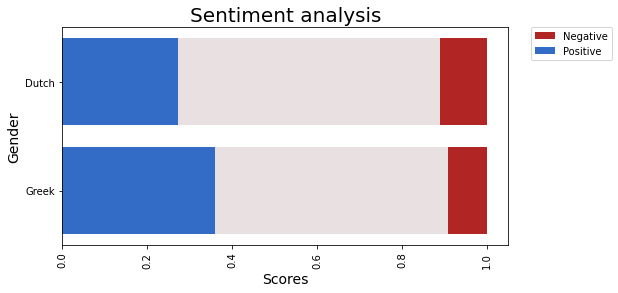

In [44]:
df = pd.DataFrame(data,columns=['nationality','neutral','positive','negative'])

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


y_axis = 'nationality'

fig = plt.figure( figsize=( 8 , 4 ) )

df['combined'] = df['positive'] + df['neutral'] + df['negative']
graph = sns.barplot( data=df , x='combined', y=y_axis , label = 'Negative', color = '#c90e0e' )
df['combined'] = df['combined'] - df['negative']
graph = sns.barplot( data=df , x='combined', y=y_axis , color = '#ebdfdf')
df['combined'] = df['combined'] - df['neutral']
graph = sns.barplot( data=df , x='combined', y=y_axis , label = 'Positive' ,color = '#1b66de')

graph.set_title('Sentiment analysis' , size = 20) 
graph.set_xlabel('Scores' , size = 14) 
graph.set_ylabel('Gender' , size = 14 )

plt.xticks(rotation= 90)

# The next line places the legend outside out the plot
plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);

plt.show()

In [48]:
def sorted_by_value( dict , ascending = True ):
    if ascending: 
        return {k: v for k, v in sorted(dict.items(), key=lambda item: item[1])}
    else:
        return {k: v for k, v in reversed( sorted(dict.items(), key=lambda item: item[1]))}


for i,sentence in enumerate(sorted_by_value(dutch_sentences)):
    if i< 15:
        print(f"{sentence}\n{dutch_sentences[sentence]}")
    else:
        break

The book touches on practically all present day social problems and issues: poverty, racism, misunderstanding and hatred between different religions and cultures, loneliness, old people struggling to find their place and value in society, dementia, the jewish problem (past and present), muslim radicalism, social security, invalidity, unemployment, violence, child abuse, rape.
-0.9895
So it can all be seen as play: the talk of blood sacrifices, the talk of war and destroying enemies, the racism, the misogyny, the arrogance and lack of pity towards the poor and suffering, the adoration of "hell" and "evil".
-0.9856
Life was actually quite rotten, really, but hardly anyone ever worried about death, even though some terminal diseases can be just as painful a way to die as a bomb or a bullet.
-0.9765
The first is, in short, about all sorts of different ways that the N-word can be used: “As we have seen, nigger can mean many different things, depenging upon, among other variables, intonation

In [49]:
for i,sentence in enumerate(sorted_by_value(greek_sentences)):
    if i< 15:
        print(f"{sentence}\n{greek_sentences[sentence]}")
    else:
        break

This is raw and hard as heck and I beg you to check out detailed trigger warnings for this book, with the ones I find prominent being (view spoiler)[ self-harm, suicide and suicidal thoughts, severe mental health issues, child sexual abuse, child prostitution (hide spoiler)] After getting that out of the way, this is an absolutely heartbreaking story of people hurting people either willingly or due to ignorance, it's a story full of all kinds of abuse, it's a story of friendships gone either very right or very wrong, a story that fills you with emptiness, sadness, the certainty that everything is awful, corrupted and pointless when there's so much hurting in this life!Literally you just read through the protagonist's life thinking "oh, come on, what more absolute tragedy can possibly strike this one (1) person throughout one (1) lifetime?"
-0.9934
(view spoiler)[ If only Marcus had taken his wife with him in England, and hadn't chose to stay in a country that had no future at all, his 